In [1]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd

C:\Users\rayja\anaconda3\envs\python3816\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\rayja\anaconda3\envs\python3816\lib\site-packages\numpy\.libs\libopenblas.4sp5sua7cbgxueoc35yp2asoicyyeqzz.gfortran-win_amd64.dll
C:\Users\rayja\anaconda3\envs\python3816\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\rayja\anaconda3\envs\python3816\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\rayja\anaconda3\envs\python3816\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
import pickle

In [3]:
# Define the paths for images and masks
image_path = 'Road Segmentation Dataset/images'
mask_path = 'Road Segmentation Dataset/masks'

In [4]:
#img_w, img_h = 64, 64
img_w, img_h = 1280,720

In [5]:
def normalze(img):
    #return img/255.
    return img

In [6]:
def remove_white_boaders(img):
    img_h, img_w = img.shape[:2]
    cropped = img[15:img_h-15, 15:img_w-15, :]
    return cropped

# Step 1: Load and Preprocess Images
First, we'll load the RGB images and their corresponding masks, resize them to 64x64 pixels, and convert them to RGB format.

In [7]:
# Lists to store the preprocessed images and masks
preprocessed_images = []
preprocessed_masks = []

# Load and preprocess images
for i in range(31):
    # Load the image and mask
    rgb_image = cv2.imread(os.path.join(image_path, f'{i}.png'))
    mask_image = cv2.imread(os.path.join(mask_path, f'{i}.png'))
    
    rgb_image = remove_white_boaders(rgb_image)
    mask_image = remove_white_boaders(mask_image)
    
    # Resize to 64x64
    rgb_image = cv2.resize(rgb_image, (img_w, img_h))
    mask_image = cv2.resize(mask_image, (img_w, img_h))

    # Convert both to RGB
    rgb_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB)
    mask_image = cv2.cvtColor(mask_image, cv2.COLOR_BGR2RGB)
    
    # normalize rgb image
    rgb_image = normalze(rgb_image)
    
    # Store the preprocessed images and masks
    preprocessed_images.append(rgb_image)
    preprocessed_masks.append(mask_image)

In [8]:
visual_img = preprocessed_images[0]
visual_mask = preprocessed_masks[0]

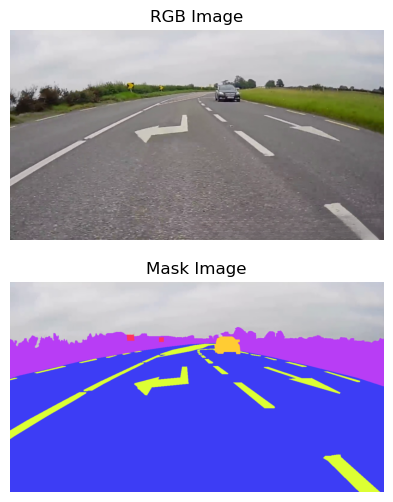

In [9]:
# Display the images
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.imshow(visual_img)
plt.title('RGB Image')
plt.axis('off')

plt.subplot(2, 1, 2)
plt.imshow(visual_mask)
plt.title('Mask Image')
plt.axis('off')

plt.show()

In [10]:
def generate_gabor_features(in_img):
    img = cv2.cvtColor(in_img, cv2.COLOR_RGB2GRAY)
    
    num = 1  # To count numbers up in order to give Gabor features a label
    gabor_features = []

    for theta in range(2):  # Define number of thetas
        theta_rad = theta / 4. * np.pi  # Convert theta to radians
        for sigma in (1, 3):  # Sigma with 1 and 3
            for lamda in np.arange(0, np.pi, np.pi / 4):  # Range of wavelengths
                for gamma in (0.05, 0.5):  # Gamma values of 0.05 and 0.5
                    ksize = 9
                    kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta_rad, lamda, gamma, 0, ktype=cv2.CV_32F)

                    # Filter the image and add values to a list
                    fimg = cv2.filter2D(img, cv2.CV_8UC3, kernel)
                    gabor_features.append(fimg)  # Flatten and append to features list
                   
                    num += 1  # Increment for Gabor column label

    # Stack all Gabor features
    gabor_stacked = np.stack(gabor_features, axis = -1)

    return gabor_stacked

In [11]:
from skimage.filters import roberts, sobel, scharr, prewitt

In [12]:
def generate_other_features(in_img):
    other_features = []
    
    img = cv2.cvtColor(in_img, cv2.COLOR_RGB2GRAY)
    # CANNY EDGE
    edges = cv2.Canny(img, 100, 200)  # Image, min and max values
    edges = edges/255.
    other_features.append(edges)
    
    
            

    # ROBERTS EDGE
    edge_roberts = roberts(img)
    other_features.append(edge_roberts)

    # SOBEL
    edge_sobel = sobel(img)
    other_features.append(edge_sobel)

    # SCHARR
    edge_scharr = scharr(img)
    other_features.append(edge_scharr)

    # PREWITT
    edge_prewitt = prewitt(img)
    other_features.append(edge_prewitt)

    # Stack all other features
    other_features_stacked = np.stack(other_features, axis = -1)
    
    #print(np.max(edges))
    #print(np.max(edge_roberts))
    #print(np.max(edge_sobel))
    #print(np.max(edge_scharr))

    return other_features_stacked

## Apply

In [13]:
image_features = []
for i in range(len(preprocessed_images)):
    img = preprocessed_images[i]
    gabor_feat = generate_gabor_features(img)
    gabor_feat = gabor_feat/255.
    #print(gabor_feat)
    other_feat = generate_other_features(img)
    img = img/255.
    #print(other_feat)
    stacked_feat = np.concatenate((img, gabor_feat, other_feat), axis=-1)
    print(stacked_feat.shape)
    image_features.append(stacked_feat)

(720, 1280, 40)
(720, 1280, 40)
(720, 1280, 40)
(720, 1280, 40)
(720, 1280, 40)
(720, 1280, 40)
(720, 1280, 40)
(720, 1280, 40)
(720, 1280, 40)
(720, 1280, 40)
(720, 1280, 40)
(720, 1280, 40)
(720, 1280, 40)
(720, 1280, 40)
(720, 1280, 40)
(720, 1280, 40)
(720, 1280, 40)
(720, 1280, 40)
(720, 1280, 40)
(720, 1280, 40)
(720, 1280, 40)
(720, 1280, 40)
(720, 1280, 40)
(720, 1280, 40)
(720, 1280, 40)
(720, 1280, 40)
(720, 1280, 40)
(720, 1280, 40)
(720, 1280, 40)
(720, 1280, 40)
(720, 1280, 40)


In [14]:
image_features = np.stack(image_features, axis=0)

In [15]:
image_features.shape

(31, 720, 1280, 40)

In [16]:
image_features

array([[[[8.00000000e-01, 8.03921569e-01, 8.23529412e-01, ...,
          2.19222351e-03, 2.31225028e-03, 2.06684814e-03],
         [8.03921569e-01, 8.07843137e-01, 8.27450980e-01, ...,
          1.38648388e-03, 1.73310486e-03, 9.24322590e-04],
         [8.00000000e-01, 8.03921569e-01, 8.23529412e-01, ...,
          2.19222351e-03, 2.31225028e-03, 2.06684814e-03],
         ...,
         [7.60784314e-01, 7.76470588e-01, 8.35294118e-01, ...,
          1.38648388e-03, 1.03986291e-03, 1.84864518e-03],
         [7.60784314e-01, 7.76470588e-01, 8.35294118e-01, ...,
          4.90196078e-03, 5.17034880e-03, 4.62161295e-03],
         [7.64705882e-01, 7.88235294e-01, 8.62745098e-01, ...,
          4.38444701e-03, 4.82787147e-03, 3.81107967e-03]],

        [[7.92156863e-01, 8.03921569e-01, 8.39215686e-01, ...,
          5.27957334e-03, 5.26247808e-03, 5.38968056e-03],
         [7.92156863e-01, 8.03921569e-01, 8.39215686e-01, ...,
          3.10027222e-03, 2.96153088e-03, 3.33269249e-03],
        

In [17]:
np.max(image_features)

1.0

In [18]:
image_features = (image_features*255).astype(np.uint8)

In [19]:
np.max(image_features)

255

In [20]:
num_feature = image_features.shape[-1]

In [21]:
num_feature

40

# Step 2: Encode Masks
After loading and preprocessing the images, we'll encode the masks

In [22]:
def encode_mask(mask, class_colors):
    encoded = np.full(mask.shape[:2], len(class_colors), dtype=int)  # Default to background
    for class_id, color in enumerate(class_colors.values()):
        encoded[np.where((mask == color).all(axis=2))] = class_id
    return encoded

In [23]:
# RGB values for known classes
class_colors = {
    "road_surface": (61, 61, 245),
    "marking": (221, 255, 51),
    "road_sign": (255, 53, 94),
    "car": (255, 204, 51)
}

In [24]:
# List to store encoded masks
encoded_masks = []

# Encode each mask
for mask in preprocessed_masks:
    encoded_mask = encode_mask(mask, class_colors)
    encoded_masks.append(encoded_mask)

In [25]:
temp_mask = encoded_masks[0]

In [26]:
temp_mask.shape

(720, 1280)

In [27]:
np.unique(temp_mask, return_counts=True)

(array([0, 1, 2, 3, 4]),
 array([535602,  33272,    698,   4241, 347787], dtype=int64))

In [28]:
# Define a new color map for visualization (RGB colors)
new_color_map = {
    0: (255, 0, 0),     # Red for road_surface
    1: (0, 255, 0),     # Green for marking
    2: (0, 0, 255),     # Blue for road_sign
    3: (255, 255, 0),   # Yellow for car
    4: (255, 0, 255)    # Magenta for background
}

In [29]:
# Create a legend for the color map
legend_handles = [mpatches.Patch(color=np.array(color)/255.0, label=class_name) 
                  for class_name, color in zip(['Road Surface', 'Marking', 'Road Sign', 'Car', 'Background'], new_color_map.values())]

In [30]:
def labels_to_rgb(mask, color_map):
    """
    Converts a mask with class labels to an RGB image using a specified color map.

    Args:
    - mask (numpy.ndarray): A 2D array where each element is a class label.
    - color_map (dict): A dictionary mapping class labels to RGB color tuples.

    Returns:
    - numpy.ndarray: An RGB image representing the mask.
    """
    rgb_mask = np.zeros((mask.shape[0], mask.shape[1], 3), dtype=np.uint8)
    for class_id, color in color_map.items():
        rgb_mask[mask == class_id] = color
    return rgb_mask

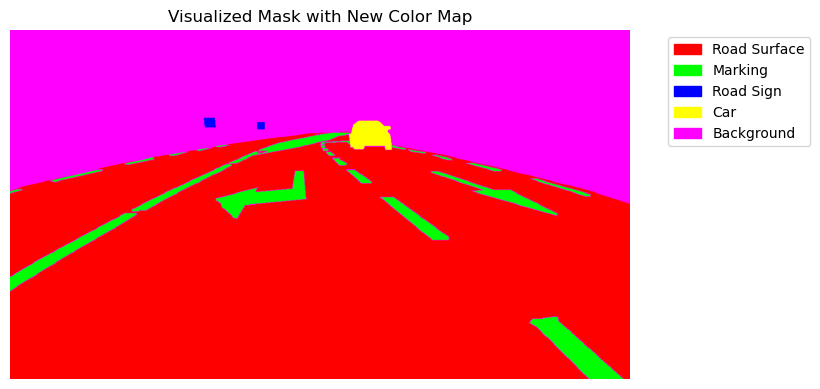

In [31]:
# Create an RGB image from the encoded mask using the new color map
visual_mask = labels_to_rgb(temp_mask, new_color_map)

# Display the visual mask
plt.figure(figsize=(8, 8))
plt.imshow(visual_mask)
plt.title('Visualized Mask with New Color Map')
plt.axis('off')

# Add the legend
plt.legend(handles=legend_handles, bbox_to_anchor=(1.05, 1), loc='upper left')
    
plt.show()

## Equal Sample Rate Pixel Sampling for SVM Training

To improve the efficiency of SVM training for image segmentation and address potential class imbalances, an equal sample rate strategy can be employed. This approach ensures a balanced dataset by sampling an equal number of pixels from each class.

### Steps for Implementation

1. **Collect Pixels by Class**:
   - Separate the pixels in the dataset by their class labels.

2. **Determine Minimum Number of Pixels**:
   - Find the class with the least number of pixels.
   - This count becomes the baseline for sampling from all classes.

3. **Sample Pixels Equally from Each Class**:
   - From each class, randomly sample a number of pixels equal to the determined minimum.

4. **Prepare the Training Dataset**:
   - Combine these equally sampled pixels to create a balanced training dataset.

In [32]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
preprocessed_images = np.stack(preprocessed_images, axis=0)
encoded_masks = np.stack(encoded_masks, axis=0)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(image_features, encoded_masks, test_size=0.1, random_state=42)

In [36]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (27, 720, 1280, 40)
Shape of y_train: (27, 720, 1280)
Shape of X_test: (4, 720, 1280, 40)
Shape of y_test: (4, 720, 1280)


In [37]:
# Assuming preprocessed_images and encoded_masks are already defined and processed
#X_train = np.vstack([img.reshape(-1, 3) for img in X_train])  # Flatten each image to a list of RGB pixels
#y_train = np.hstack([mask.flatten() for mask in y_train])  # Flatten each mask
#X_test = np.vstack([img.reshape(-1, 3) for img in X_test])  # Flatten each image to a list of RGB pixels
#y_test = np.hstack([mask.flatten() for mask in y_test])  # Flatten each mask

In [38]:
pixel_counts = np.bincount(y_train.flatten())

print("In training data: ")
for class_id, count in enumerate(pixel_counts):
    print(f"Class {class_id} has {count} pixels")

In training data: 
Class 0 has 13962931 pixels
Class 1 has 387103 pixels
Class 2 has 124188 pixels
Class 3 has 158972 pixels
Class 4 has 10250006 pixels


In [39]:
pixel_counts = np.bincount(y_test.flatten())

print("In testing data: ")
for class_id, count in enumerate(pixel_counts):
    print(f"Class {class_id} has {count} pixels")

In testing data: 
Class 0 has 2058908 pixels
Class 1 has 33424 pixels
Class 2 has 8859 pixels
Class 3 has 5772 pixels
Class 4 has 1579437 pixels


In [40]:
def sample_pixels_randomly(X, y, num_classes=5, sample_fraction=None, sample_pixel_number=None):
    """
    Randomly samples pixels from each class with either a fraction or a fixed number of pixels.
    Raises an error if the requested number of pixels exceeds the available pixels in any class.

    Args:
    - X (numpy.ndarray): image data.
    - y (numpy.ndarray): Corresponding class labels.
    - num_classes (int): Number of classes.
    - sample_fraction (float, optional): Fraction of pixels to sample from each class.
    - sample_pixel_number (int, optional): Fixed number of pixels to sample from each class.

    Returns:
    - (numpy.ndarray, numpy.ndarray): Sampled image data and labels.
    """
    sampled_X = []
    sampled_y = []
    
    X = X.reshape(-1, num_feature)
    y = np.hstack([mask.flatten() for mask in y])

    for class_id in range(num_classes):
        # Extract pixels for the current class
        class_pixels = X[y == class_id]

        # Determine number of samples
        if sample_fraction is not None:
            num_samples = int(len(class_pixels) * sample_fraction)
        elif sample_pixel_number is not None:
            #if sample_pixel_number > len(class_pixels):
                #raise ValueError(f"Requested number of pixels ({sample_pixel_number}) exceeds available pixels in class {class_id}.")
            #num_samples = sample_pixel_number
            num_samples = min(sample_pixel_number, len(class_pixels))
        else:
            raise ValueError("Either sample_fraction or sample_pixel_number must be provided.")

        # Random sampling
        sampled_indices = np.random.choice(len(class_pixels), num_samples, replace=False)
        sampled_X.append(class_pixels[sampled_indices])
        sampled_y.extend([class_id] * num_samples)

    return np.vstack(sampled_X), np.array(sampled_y)

In [41]:
clf = svm.SVC(kernel='linear')

In [42]:
num_iterations = 1  # Number of times to repeat the training process

acc_list = []
for i in range(num_iterations):
    print("iter: ", i)
    # Sample the pixels
    sampled_X_train, sampled_y_train = sample_pixels_randomly(X_train, y_train, sample_pixel_number=4096)
    #sampled_X_train, sampled_y_train = sample_pixels_randomly(X_train, y_train, sample_fraction = 0.2)
    
    print("Shape of sampled_X:", sampled_X_train.shape)
    print("Shape of sampled_y:", sampled_y_train.shape)
    #print(sampled_X_train)
    #print(sampled_y_train)
    
    pixel_counts = np.bincount(sampled_y_train)
    for class_id, count in enumerate(pixel_counts):
        print(f"Class {class_id}: {count} pixels")
    
    # train the SVM    
    print("Training...")
    clf.fit(sampled_X_train, sampled_y_train)
    
    y_pred = clf.predict(sampled_X_train)
    accuracy = accuracy_score(sampled_y_train, y_pred)
    print(f"Train Accuracy: {accuracy:.2f}")
    print("--------------------------------------")

    # Evaluate the model
    print("Evaluating...")
    sampled_X_test, sampled_y_test = sample_pixels_randomly(X_test, y_test, sample_pixel_number=2048)
    #sampled_X_test, sampled_y_test = sample_pixels_randomly(X_test, y_test,  sample_fraction = 0.2)
    
    pixel_counts = np.bincount(sampled_y_test)
    for class_id, count in enumerate(pixel_counts):
        print(f"Class {class_id}: {count} pixels")
        
    y_pred = clf.predict(sampled_X_test)
    accuracy = accuracy_score(sampled_y_test, y_pred)
    print(f"Test Accuracy: {accuracy:.2f}")
    print("--------------------------------------")
    acc_list.append(accuracy)

iter:  0
Shape of sampled_X: (20480, 40)
Shape of sampled_y: (20480,)
Class 0: 4096 pixels
Class 1: 4096 pixels
Class 2: 4096 pixels
Class 3: 4096 pixels
Class 4: 4096 pixels
Training...
Train Accuracy: 0.79
--------------------------------------
Evaluating...
Class 0: 2048 pixels
Class 1: 2048 pixels
Class 2: 2048 pixels
Class 3: 2048 pixels
Class 4: 2048 pixels
Test Accuracy: 0.75
--------------------------------------


# Predict on testing images

Test Accuracy: 0.94


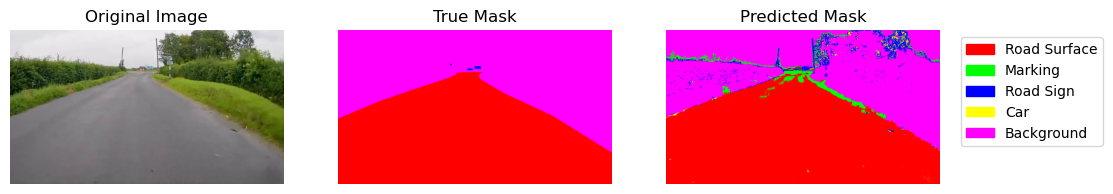

Test Accuracy: 0.91


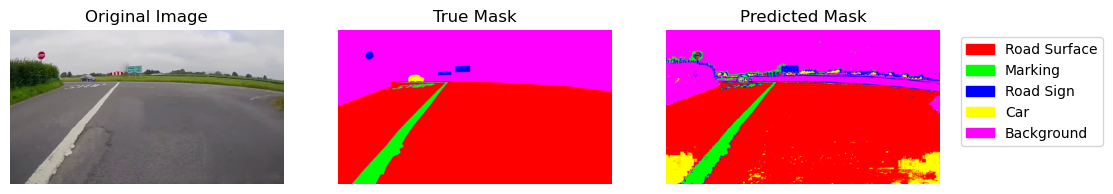

In [ ]:
# Number of images to display
#num_images_to_show = 7

# Randomly select a few images from the test set
#test_indices = np.random.choice(X_test.shape[0], num_images_to_show, replace=False)
test_acc = []
#for idx in test_indices:
for idx in range(X_test.shape[0]):
    # Extract and reshape the flattened image and mask
    test_data = X_test[idx]
    
    #print(test_data[:,:,:3].shape)
    flattened_data = test_data.reshape(-1, num_feature)
    true_mask = y_test[idx]

    # Predict the mask
    predicted_mask_flat = clf.predict(flattened_data)    
    y_pred = clf.predict(sampled_X_test)
    
    accuracy = accuracy_score(true_mask.flatten(), predicted_mask_flat)
    print(f"Test Accuracy: {accuracy:.2f}")
    test_acc.append(accuracy)
   

    # Convert label masks to RGB
    test_img = test_data[:,:,:3].reshape(img_h, img_w, 3)
    predicted_mask = predicted_mask_flat.reshape(img_h, img_w)
    true_mask_rgb = labels_to_rgb(true_mask, new_color_map)
    predicted_mask_rgb = labels_to_rgb(predicted_mask, new_color_map)

    # Visualize the original image, true mask, and predicted mask
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(test_img)
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(true_mask_rgb)
    plt.title("True Mask")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(predicted_mask_rgb)
    plt.title("Predicted Mask")
    plt.axis('off')
    
    # Add the legend
    plt.legend(handles=legend_handles, bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.show()

In [ ]:
np.mean(test_acc)

In [ ]:
clf.support_vectors_

In [ ]:
# Number of support vectors
num_support_vectors = len(clf.support_vectors_)
print(f"Number of Support Vectors: {num_support_vectors}")